# Customer Churn Project

## Índice

[Import libraries](#import-libraries)
1. [Quick EDA](#1-quick-eda)

### Import libraries

In [549]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

### 1. Exploratory Data Analysis

#### 1.1. Quick EDA

In [550]:
#Importing the dataset

df = pd.read_csv('classificationdata.csv', index_col='id')
df.head()

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
id,,,,,,,,,,,,,,,,,,,,,
0,HI,156,14.0,Yes,1.0,6.0,area_code_510,no,no,0,...,108,19.138302,208.349932,130,9.190181,8.015688,7,2.248902,7,no
1,MI,216,8.0,No,14.0,9.0,area_code_408,no,no,3,...,71,15.474436,228.902063,85,10.277852,9.683971,8,2.609739,3,no
2,NH,18,20.0,No,12.0,1.0,area_code_408,no,no,1,...,55,22.547297,202.353527,127,8.898488,14.039450,8,3.845776,2,no
3,MN,174,9.0,No,12.0,6.0,area_code_415,no,no,2,...,105,16.666506,214.487530,105,9.740333,13.031063,4,3.525823,1,no
4,TX,68,19.0,No,22.0,5.0,area_code_415,no,no,1,...,88,20.408969,190.047534,113,8.813303,6.760950,4,1.828652,0,no


In [551]:
f'The dataset contains {df.shape[0]} rows y {df.shape[1]} columns'

'The dataset contains 17243 rows y 24 columns'

The data in each column is:

In [552]:
df.columns

Index(['state_code', 'tenure', 'contract_length', 'promotions_offered',
       'remaining_term', 'last_nps_rating', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

And there are 5 categorial and 19 numerical features:

In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17243 entries, 0 to 17242
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state_code                     17243 non-null  object 
 1   tenure                         17243 non-null  int64  
 2   contract_length                17196 non-null  float64
 3   promotions_offered             17196 non-null  object 
 4   remaining_term                 17196 non-null  float64
 5   last_nps_rating                17196 non-null  float64
 6   area_code                      17231 non-null  object 
 7   international_plan             17243 non-null  object 
 8   voice_mail_plan                17213 non-null  object 
 9   number_vmail_messages          17243 non-null  int64  
 10  total_day_minutes              17243 non-null  float64
 11  total_day_calls                17243 non-null  int64  
 12  total_day_charge               17243 non-null 

The dataset also contains null values:

In [554]:
df.isnull().sum()

state_code                        0
tenure                            0
contract_length                  47
promotions_offered               47
remaining_term                   47
last_nps_rating                  47
area_code                        12
international_plan                0
voice_mail_plan                  30
number_vmail_messages             0
total_day_minutes                 0
total_day_calls                   0
total_day_charge                  0
total_eve_minutes                18
total_eve_calls                   0
total_eve_charge                  0
total_night_minutes               0
total_night_calls                 0
total_night_charge                0
total_intl_minutes                0
total_intl_calls                  0
total_intl_charge                 0
number_customer_service_calls     0
churn                            47
dtype: int64

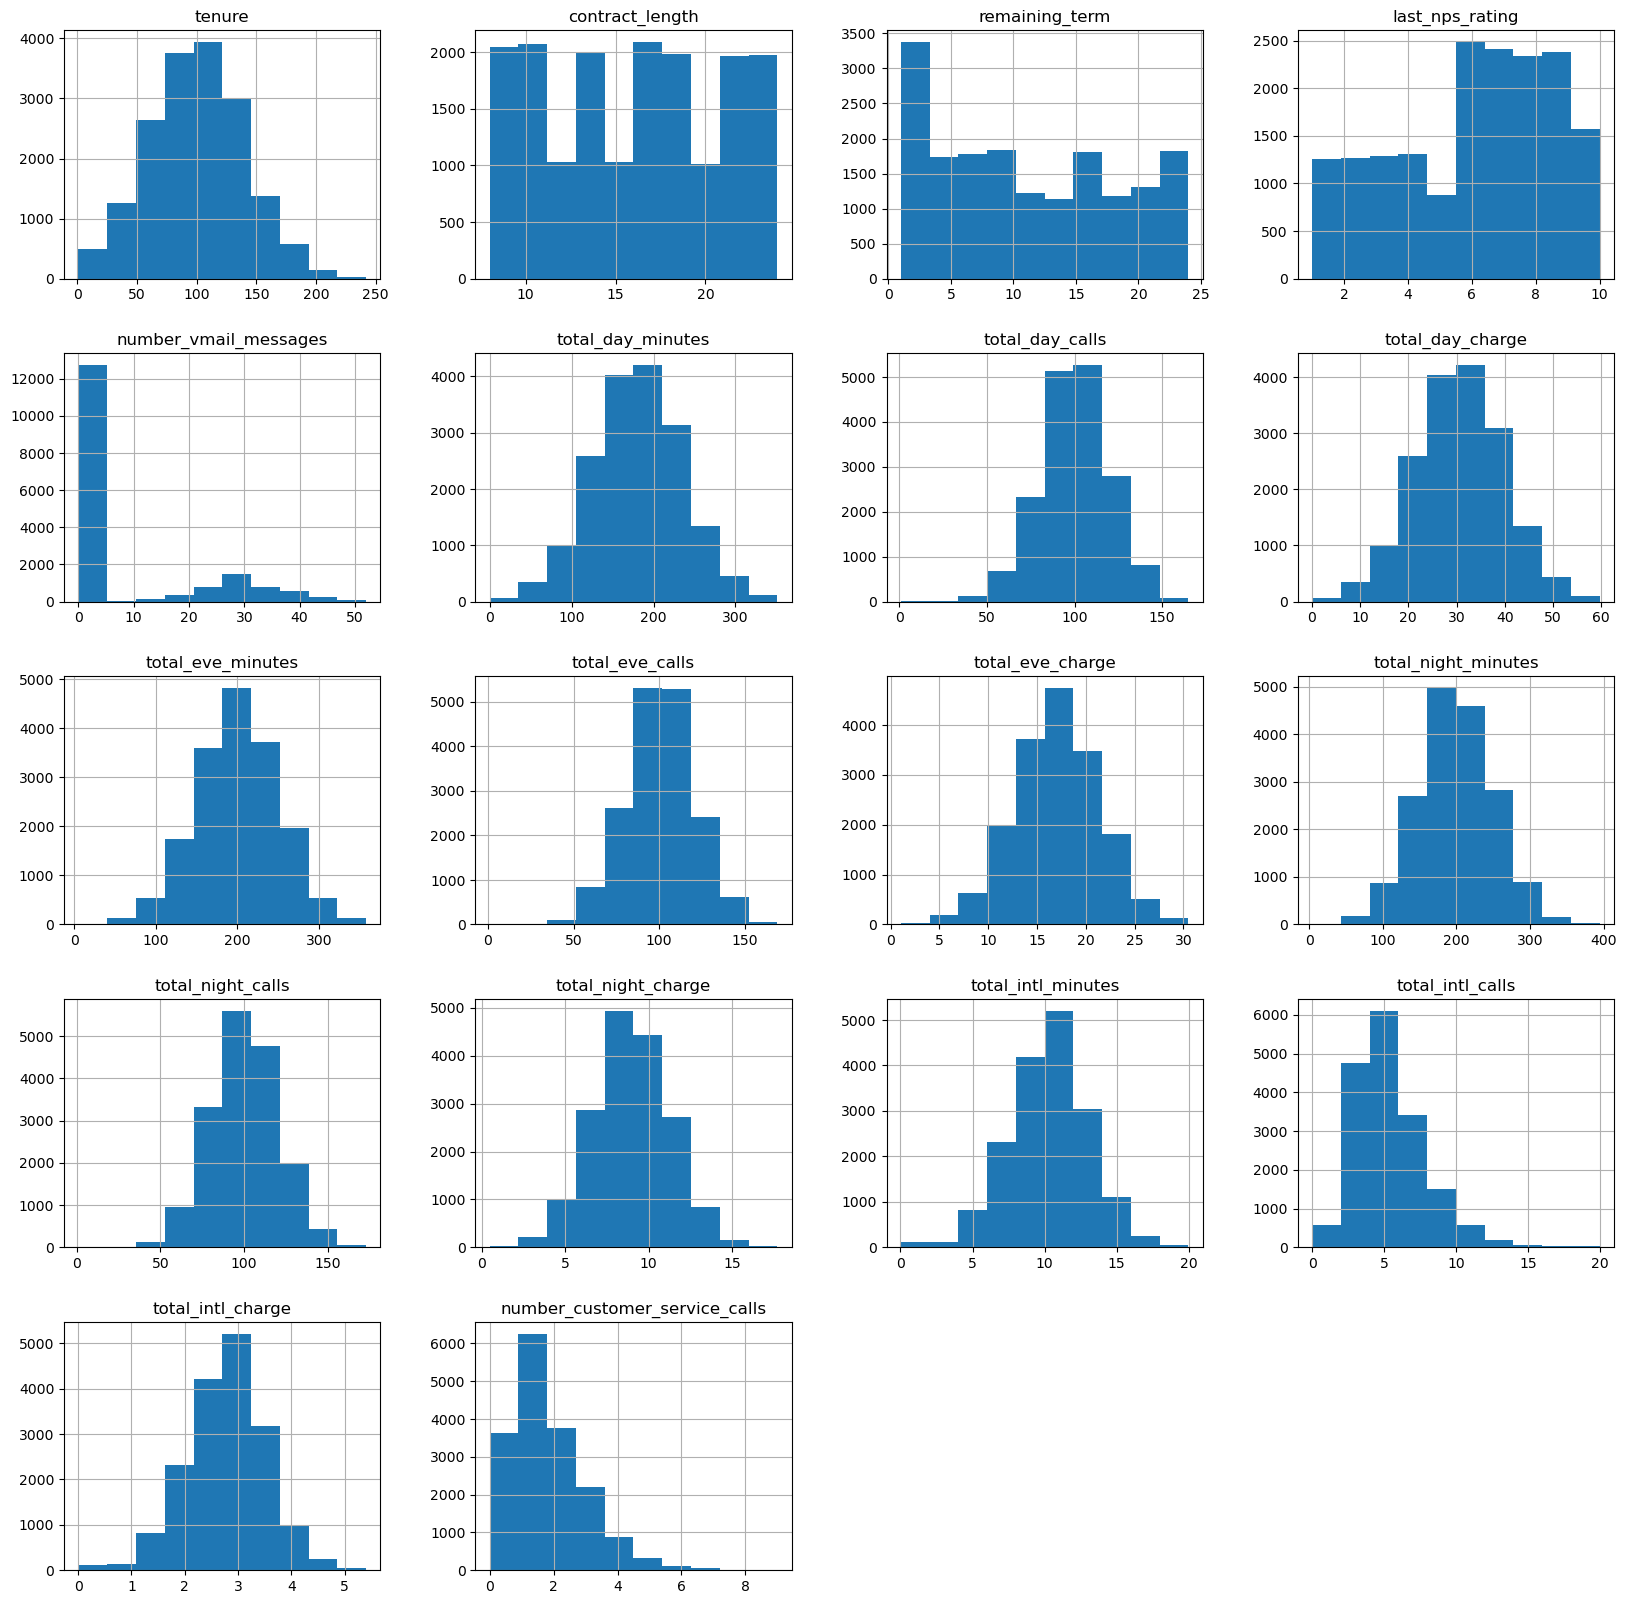

In [555]:
%matplotlib inline
df.hist(figsize=(20,20))
plt.show()

#### 1.2. Analysing categorial features

#### 1.3. Analysing relationships

### 2. Data Preprocessing

#### 2.1. Missing categorial features

In [556]:
df['area_code'] = df['area_code'].fillna('missing')
df['voice_mail_plan'] = df['voice_mail_plan'].fillna('missing')

In [557]:
df.isnull().sum()

state_code                        0
tenure                            0
contract_length                  47
promotions_offered               47
remaining_term                   47
last_nps_rating                  47
area_code                         0
international_plan                0
voice_mail_plan                   0
number_vmail_messages             0
total_day_minutes                 0
total_day_calls                   0
total_day_charge                  0
total_eve_minutes                18
total_eve_calls                   0
total_eve_charge                  0
total_night_minutes               0
total_night_calls                 0
total_night_charge                0
total_intl_minutes                0
total_intl_calls                  0
total_intl_charge                 0
number_customer_service_calls     0
churn                            47
dtype: int64

#### 2.2. Missing numerical values

In [558]:
mean_eve_mins = df['total_eve_minutes'].mean().round(2)
df['total_eve_minutes'] = df['total_eve_minutes'].fillna(mean_eve_mins)
df.isnull().sum()

state_code                        0
tenure                            0
contract_length                  47
promotions_offered               47
remaining_term                   47
last_nps_rating                  47
area_code                         0
international_plan                0
voice_mail_plan                   0
number_vmail_messages             0
total_day_minutes                 0
total_day_calls                   0
total_day_charge                  0
total_eve_minutes                 0
total_eve_calls                   0
total_eve_charge                  0
total_night_minutes               0
total_night_calls                 0
total_night_charge                0
total_intl_minutes                0
total_intl_calls                  0
total_intl_charge                 0
number_customer_service_calls     0
churn                            47
dtype: int64

#### 2.3. Missing target features

In [559]:
df = df.dropna(axis=0)
df.isnull().sum()

state_code                       0
tenure                           0
contract_length                  0
promotions_offered               0
remaining_term                   0
last_nps_rating                  0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

### 3. Feature Engineering

In [560]:
X_temp = df.drop('churn', axis=1)
y_temp = np.where(df['churn'] == 'yes',1,0)

#### 3.1. Create ratios for correlated predictors

In [561]:
# Create ratios
X_temp['day_ratio'] = X_temp['total_day_charge'] / X_temp['total_day_minutes']
X_temp['eve_ratio'] = X_temp['total_eve_charge'] / X_temp['total_eve_minutes']
X_temp['night_ratio'] = X_temp['total_night_charge'] / X_temp['total_night_minutes']
X_temp['intl_ratio'] = X_temp['total_intl_charge'] / X_temp['total_intl_minutes']

In [562]:
X_temp.drop(['total_day_charge','total_day_minutes','total_eve_charge','total_eve_minutes','total_night_charge','total_night_minutes','total_intl_charge','total_intl_minutes'], axis=1, inplace=True)
X_temp.head()

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,day_ratio,eve_ratio,night_ratio,intl_ratio
id,,,,,,,,,,,,,,,,,,,
0,HI,156,14.0,Yes,1.0,6.0,area_code_510,no,no,0,63,108,130,7,7,0.175435,0.082497,0.044109,0.280563
1,MI,216,8.0,No,14.0,9.0,area_code_408,no,no,3,105,71,85,8,3,0.171020,0.081115,0.044901,0.269491
2,NH,18,20.0,No,12.0,1.0,area_code_408,no,no,1,95,55,127,8,2,0.172615,0.084012,0.043975,0.273926
3,MN,174,9.0,No,12.0,6.0,area_code_415,no,no,2,53,105,105,4,1,0.155908,0.085223,0.045412,0.270571
4,TX,68,19.0,No,22.0,5.0,area_code_415,no,no,1,85,88,113,4,0,0.174446,0.085782,0.046374,0.270473


In [563]:
X_temp.columns

Index(['state_code', 'tenure', 'contract_length', 'promotions_offered',
       'remaining_term', 'last_nps_rating', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_calls',
       'total_eve_calls', 'total_night_calls', 'total_intl_calls',
       'number_customer_service_calls', 'day_ratio', 'eve_ratio',
       'night_ratio', 'intl_ratio'],
      dtype='object')

In [564]:
X_temp.head()

,state_code,tenure,contract_length,promotions_offered,remaining_term,last_nps_rating,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,day_ratio,eve_ratio,night_ratio,intl_ratio
id,,,,,,,,,,,,,,,,,,,
0,HI,156,14.0,Yes,1.0,6.0,area_code_510,no,no,0,63,108,130,7,7,0.175435,0.082497,0.044109,0.280563
1,MI,216,8.0,No,14.0,9.0,area_code_408,no,no,3,105,71,85,8,3,0.171020,0.081115,0.044901,0.269491
2,NH,18,20.0,No,12.0,1.0,area_code_408,no,no,1,95,55,127,8,2,0.172615,0.084012,0.043975,0.273926
3,MN,174,9.0,No,12.0,6.0,area_code_415,no,no,2,53,105,105,4,1,0.155908,0.085223,0.045412,0.270571
4,TX,68,19.0,No,22.0,5.0,area_code_415,no,no,1,85,88,113,4,0,0.174446,0.085782,0.046374,0.270473


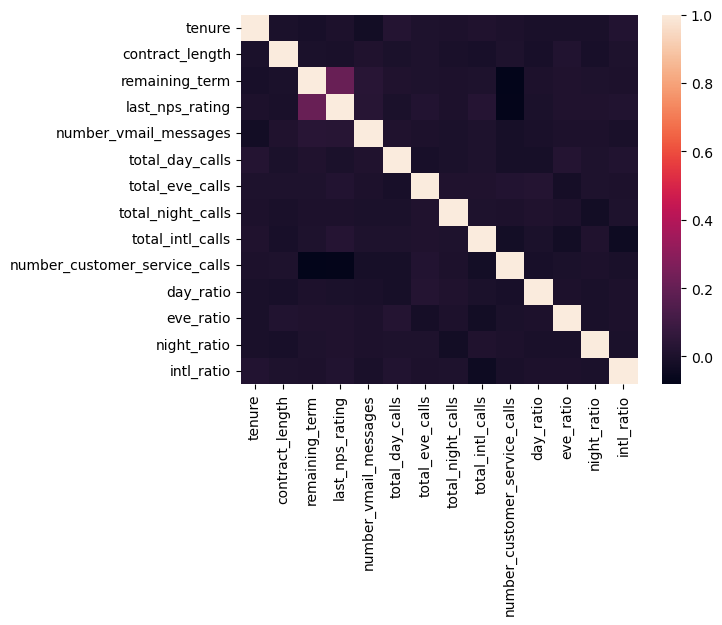

In [565]:
sns.heatmap(X_temp.select_dtypes(exclude='object').corr())
plt.show()

#### 3.3. Other transformations

In [566]:
X_temp['promotions_offered'] = X_temp['promotions_offered'].replace(['NO',np.NaN],'No')

#### 3.2. Encoding columns

In [567]:
onehot = OneHotEncoder(handle_unknown='ignore')
encoded_columns = onehot.fit_transform(X_temp.select_dtypes(include='object')).toarray()

In [568]:
X_temp = X_temp.select_dtypes(exclude='object')
X_temp[onehot.get_feature_names_out()] = encoded_columns
X_temp.head()

,tenure,contract_length,remaining_term,last_nps_rating,number_vmail_messages,total_day_calls,total_eve_calls,total_night_calls,total_intl_calls,number_customer_service_calls,...,promotions_offered_Yes,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,area_code_missing,international_plan_no,international_plan_yes,voice_mail_plan_missing,voice_mail_plan_no,voice_mail_plan_yes
id,,,,,,,,,,,,,,,,,,,,,
0,156,14.0,1.0,6.0,0,63,108,130,7,7,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,216,8.0,14.0,9.0,3,105,71,85,8,3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,18,20.0,12.0,1.0,1,95,55,127,8,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,174,9.0,12.0,6.0,2,53,105,105,4,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,68,19.0,22.0,5.0,1,85,88,113,4,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [569]:
X_temp.columns

Index(['tenure', 'contract_length', 'remaining_term', 'last_nps_rating',
       'number_vmail_messages', 'total_day_calls', 'total_eve_calls',
       'total_night_calls', 'total_intl_calls',
       'number_customer_service_calls', 'day_ratio', 'eve_ratio',
       'night_ratio', 'intl_ratio', 'state_code_AK', 'state_code_AL',
       'state_code_AR', 'state_code_AZ', 'state_code_CA', 'state_code_CO',
       'state_code_CT', 'state_code_DC', 'state_code_DE', 'state_code_FL',
       'state_code_GA', 'state_code_HI', 'state_code_IA', 'state_code_ID',
       'state_code_IL', 'state_code_IN', 'state_code_KS', 'state_code_KY',
       'state_code_LA', 'state_code_MA', 'state_code_MD', 'state_code_ME',
       'state_code_MI', 'state_code_MN', 'state_code_MO', 'state_code_MS',
       'state_code_MT', 'state_code_NC', 'state_code_ND', 'state_code_NE',
       'state_code_NH', 'state_code_NJ', 'state_code_NM', 'state_code_NV',
       'state_code_NY', 'state_code_OH', 'state_code_OK', 'state_code_OR'

Split the train and test sets:

In [570]:
scaler = StandardScaler() #Initialize the scaler
X_temp_scaled = scaler.fit_transform(X_temp) #Fit the data and transform it
X_train, X_test, y_train, y_test = train_test_split(X_temp_scaled, y_temp, test_size=0.3, random_state=1234) #Split the original data in the train and test sets

### 4. Building the Machine Learning Model

#### 4.1. Building a Logistic Regression Model from scratch

The logistic regression model is represented by:

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function, which is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

In [571]:
# Sigmoid function
def sigmoid(z):
    g = 1 / (1+np.exp(-z))
    return g

Now, the cost function is:

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset

* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost function (so, the error commited in each data point)
        
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.

In [544]:
# Cost function
def compute_cost(X,y,w,b):
    n_rows,n_features = X.shape #m is the number of rows and n the number of features
    
    total_cost=0
    
    for i in range(n_rows):
        z = np.dot(w.T,X[i]) + b
        g = sigmoid(z)
        total_cost += -((y[i]*np.log(g)) + (1-y[i])*np.log(1-g))
    total_cost = total_cost / n_rows
    
    return total_cost

Now it is time to implement the gradient descent:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously.

The first step then is computing the partial derivatives (gradient) for each weight and the scalar b:

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$

Where

*   m is the number of training examples in the dataset.
*   $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label

In [572]:
def calculate_gradient(X,y,w,b):
    
    """
    Returns the value of the partial derivative of every w_j and b points given
    
    Args:
    X : (ndarray Shape (m, n))
    y:  (array_like Shape (m,1))    Actual value 
    w : (array_like Shape (n,1))    Values of parameters of the model      
    b : (scalar)                    Value of parameter of the model 

    Returns:
    dj_dw: (ndarray Shape (n,1))    The gradient of the cost function for each parameter w_j 
    dj_db: (scalar)                 The gradient of the cost function for the parameter b
    """
    
    n_rows,n_features = X.shape 
    dj_dw = np.zeros((n_features,)) #Initializing the gradient
    dj_db = 0
    
    for r in range(n_rows):
        
        z = np.dot(w.T,X[r])+b
        g = sigmoid(z)
        dj_db_r = g-y[r]
        dj_db += dj_db_r
        
        for f in range(n_features):
            
            dj_dw_r_j = (g-y[r])*X[r,f]
            dj_dw[f] += dj_dw_r_j 
            
    dj_db = dj_db / n_rows
    dj_dw = dj_dw / n_rows
            
    return dj_dw,dj_db        

In [573]:
def logisting_reg_model (X,y,learning_rate,n_iterations):
    
    """
    Trains a logistic regresion model using the gradient descent method
    
    Args:
    X : (ndarray Shape (m, n))
    y:  (array_like Shape (m,1))    Actual value 
    learning_rate
    n_iterations:                   Number of iterations to run the gradient descent 

    Returns:
    w : (array_like Shape (n,))     Updated values of parameters of the model after running gradient descent
    b : (scalar)                    Updated value of parameter of the model after running gradient descent
    J_history                       The cost of each iteration
    """
    
    w = np.zeros((X.shape[1],))
    b = 0
    
    J_history = []
    w_history = []
    b_history = []
    
    for i in range(n_iterations):
        
        dj_dw,dj_db = calculate_gradient(X,y,w,b)
        
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db
        
        J = compute_cost(X,y,w,b)
        
        J_history.append(J)
        
        if i % 100 == 0:
            
            w_history.append(w)
            b_history.append(b)
            
            print(f'Iteration:{i}, Cost:{J.round(2)}')
            
    return w,b,J_history

In [579]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using the logistic regresion model trained
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))               The predictions
    """
    # number of training examples
    n_rows, n_features = X.shape   
    p = np.zeros(n_rows)
   
    for i in range(n_rows):   
        
        z_wb = np.dot(w,X[i]) + b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = f_wb >= 0.5
        
    return p

Once the model is coded, let's run 2000 iterations with a learning rate of 0.01:

In [587]:
w,b,J_history = logisting_reg_model(X_train,y_train,0.01,2000)

Iteration:0, Cost:0.69
Iteration:100, Cost:0.54
Iteration:200, Cost:0.45
Iteration:300, Cost:0.4
Iteration:400, Cost:0.36
Iteration:500, Cost:0.34
Iteration:600, Cost:0.32
Iteration:700, Cost:0.3
Iteration:800, Cost:0.29
Iteration:900, Cost:0.28
Iteration:1000, Cost:0.27
Iteration:1100, Cost:0.26
Iteration:1200, Cost:0.26
Iteration:1300, Cost:0.25
Iteration:1400, Cost:0.25
Iteration:1500, Cost:0.24
Iteration:1600, Cost:0.24
Iteration:1700, Cost:0.23
Iteration:1800, Cost:0.23
Iteration:1900, Cost:0.23


The evolution of the cost function is:

Text(0, 0.5, 'Cost function')

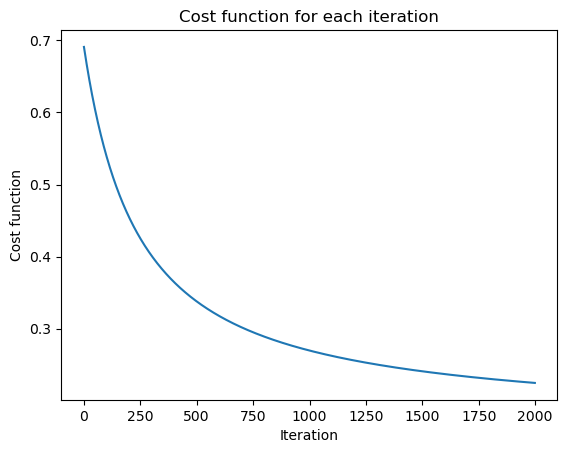

In [588]:
plt.plot(J_history)
plt.title('Cost function for each iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost function')

In [589]:
# Predictions using the trained model
y_pred = predict(X_test,w,b)

So, the 

In [603]:
prec_score = precision_score(y_test,y_pred).round(2)
accu_score = accuracy_score(y_test,y_pred).round(2)

print(f'The Precision Score is {prec_score}')
print(f'The Accuracy Score is {accu_score}')

The Precision Score is 0.73
The Accuracy Score is 0.91


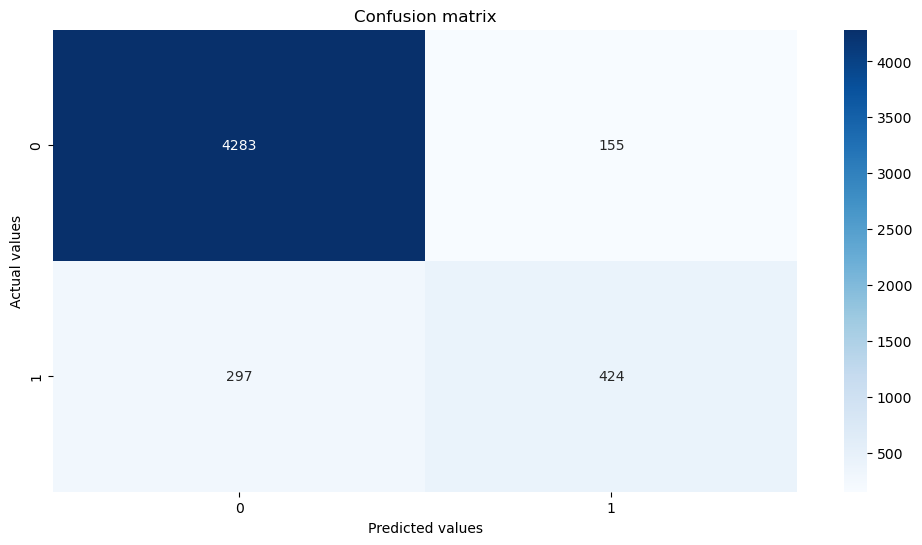

In [601]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
%matplotlib inline

#### 4.2. Using the Scikit Learn build-in Logistic Regression Model

In [312]:
from sklearn.linear_model import LogisticRegression

In [604]:
lrm = LogisticRegression(random_state=0, solver='sag', max_iter=2000).fit(X_train,y_train)

In [605]:
y_pred_lrm = lrm.predict(X_test)

In [606]:
prec_score_lrm = precision_score(y_test,y_pred_lrm).round(2)
accu_score_lrm = accuracy_score(y_test,y_pred_lrm).round(2)

print(f'The Precision Score is {prec_score_lrm}')
print(f'The Accuracy Score is {accu_score_lrm}')

The Precision Score is 0.74
The Accuracy Score is 0.92


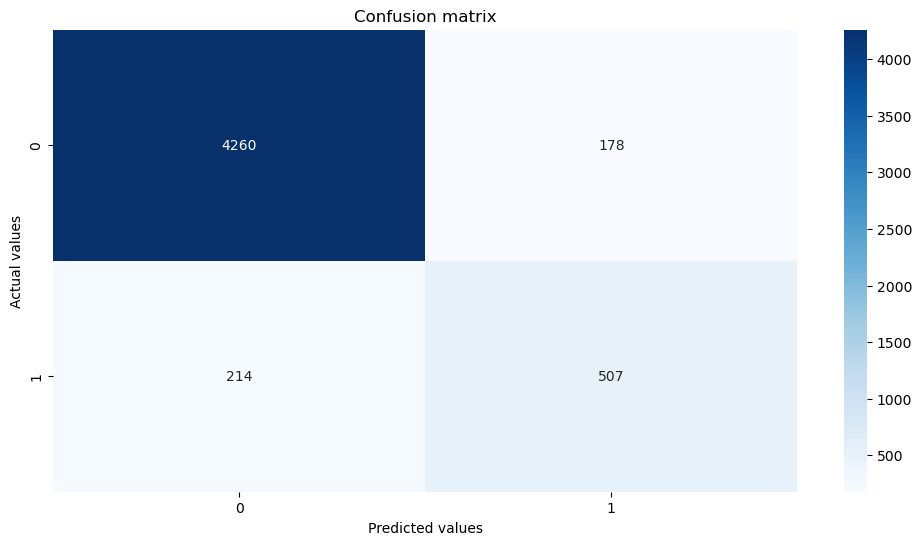

In [607]:
cm_lrm = confusion_matrix(y_test,y_pred_lrm)
plt.figure(figsize=(12,6))
sns.heatmap(cm_lrm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
%matplotlib inline

### 5. What is the model telling us?

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'tenure'),
  Text(1, 0, 'contract_length'),
  Text(2, 0, 'remaining_term'),
  Text(3, 0, 'last_nps_rating'),
  Text(4, 0, 'number_vmail_messages'),
  Text(5, 0, 'total_day_calls'),
  Text(6, 0, 'total_eve_calls'),
  Text(7, 0, 'total_night_calls'),
  Text(8, 0, 'total_intl_calls')])

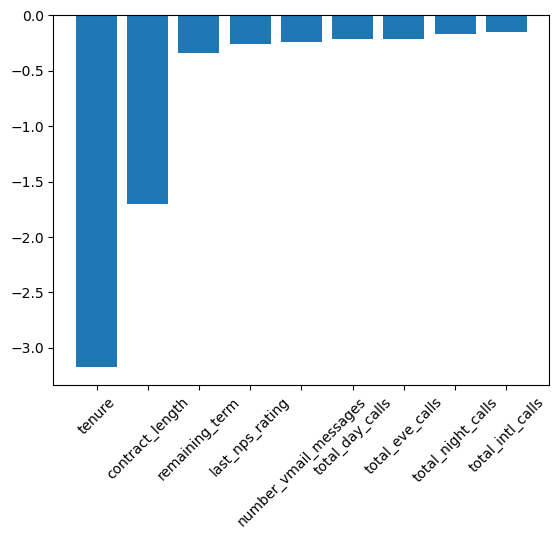

In [647]:
columns = X_temp.columns
plt.bar(columns[0:9], height=lrm.coef_[0][0:9], align='center')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'area_code_area_code_408'),
  Text(1, 0, 'area_code_area_code_415'),
  Text(2, 0, 'area_code_area_code_510'),
  Text(3, 0, 'area_code_missing'),
  Text(4, 0, 'international_plan_no'),
  Text(5, 0, 'international_plan_yes'),
  Text(6, 0, 'voice_mail_plan_missing'),
  Text(7, 0, 'voice_mail_plan_no'),
  Text(8, 0, 'voice_mail_plan_yes')])

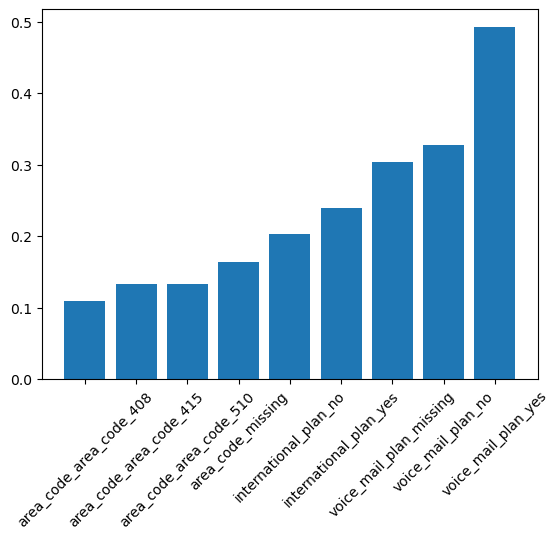

In [648]:
columns = X_temp.columns
plt.bar(columns[-9:], height=lrm.coef_[0][-9:], align='center')
plt.xticks(rotation=45)